In [1]:
#!/usr/bin/env python

# make sure to install these packages before running:
!pip install sodapy

In [2]:
#import the libraries 
import numpy as np
import pandas as pd
from pandas import DataFrame as df, Series as se
#import the library for the API
from sodapy import Socrata

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.melbourne.vic.gov.au", None)


#getting the pedestrian count data from city of melbourne website from 2009-05-01 to 
#2020-10-31
results = client.get("b2ak-trbp", limit=3391522)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)


In [4]:
results_df

,id,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts
0,2887628,2019-11-01T17:00:00.000,2019,November,1,Friday,17,34,Flinders St-Spark La,300
1,2887629,2019-11-01T17:00:00.000,2019,November,1,Friday,17,39,Alfred Place,604
2,2887630,2019-11-01T17:00:00.000,2019,November,1,Friday,17,37,Lygon St (East),216
3,2887631,2019-11-01T17:00:00.000,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
4,2887632,2019-11-01T17:00:00.000,2019,November,1,Friday,17,36,Queen St (West),774
...,...,...,...,...,...,...,...,...,...,...
3391517,3391518,2020-10-31T23:00:00.000,2020,October,31,Saturday,23,67,Flinders Ln -Degraves St (South),0
3391518,3391519,2020-10-31T23:00:00.000,2020,October,31,Saturday,23,68,Flinders Ln -Degraves St (North),0
3391519,3391520,2020-10-31T23:00:00.000,2020,October,31,Saturday,23,69,Flinders Ln -Degraves St (Crossing),0
3391520,3391521,2020-10-31T23:00:00.000,2020,October,31,Saturday,23,70,Errol Street (East),0


In [5]:
#Examining the data types of the features of the dataset  
results_df.dtypes

id               object
date_time        object
year             object
month            object
mdate            object
day              object
time             object
sensor_id        object
sensor_name      object
hourly_counts    object
dtype: object

In [6]:
results_df['date'] = results_df['mdate'] + '-' + results_df['month'] + '-' + results_df['year']
results_df.drop(columns=['id',	'date_time','year',	'month',	'mdate',	'day',	'time' ], inplace = True)

In [7]:
#converting 'sensor_id' and 'hourly_counts' features from object datatypes to int
results_df[['sensor_id','hourly_counts']] = results_df[['sensor_id','hourly_counts']].astype('int')
results_df

,sensor_id,sensor_name,hourly_counts,date
0,34,Flinders St-Spark La,300,1-November-2019
1,39,Alfred Place,604,1-November-2019
2,37,Lygon St (East),216,1-November-2019
3,40,Lonsdale St-Spring St (West),627,1-November-2019
4,36,Queen St (West),774,1-November-2019
...,...,...,...,...
3391517,67,Flinders Ln -Degraves St (South),0,31-October-2020
3391518,68,Flinders Ln -Degraves St (North),0,31-October-2020
3391519,69,Flinders Ln -Degraves St (Crossing),0,31-October-2020
3391520,70,Errol Street (East),0,31-October-2020


In [8]:
#Examining the features after data type conversion
results_df.dtypes

sensor_id         int64
sensor_name      object
hourly_counts     int64
date             object
dtype: object

In [9]:
#converting date_time feature from object datatypes to date
results_df['date'] = results_df['date'].astype('datetime64[ns]')
results_df

,sensor_id,sensor_name,hourly_counts,date
0,34,Flinders St-Spark La,300,2019-11-01
1,39,Alfred Place,604,2019-11-01
2,37,Lygon St (East),216,2019-11-01
3,40,Lonsdale St-Spring St (West),627,2019-11-01
4,36,Queen St (West),774,2019-11-01
...,...,...,...,...
3391517,67,Flinders Ln -Degraves St (South),0,2020-10-31
3391518,68,Flinders Ln -Degraves St (North),0,2020-10-31
3391519,69,Flinders Ln -Degraves St (Crossing),0,2020-10-31
3391520,70,Errol Street (East),0,2020-10-31


In [10]:
#Examining the features after data type conversion
results_df.dtypes

sensor_id                 int64
sensor_name              object
hourly_counts             int64
date             datetime64[ns]
dtype: object

In [11]:
#extracting data from 2015 till date
results_df = results_df[results_df['date'] > '2014-12-31']

In [12]:
results_df

,sensor_id,sensor_name,hourly_counts,date
0,34,Flinders St-Spark La,300,2019-11-01
1,39,Alfred Place,604,2019-11-01
2,37,Lygon St (East),216,2019-11-01
3,40,Lonsdale St-Spring St (West),627,2019-11-01
4,36,Queen St (West),774,2019-11-01
...,...,...,...,...
3391517,67,Flinders Ln -Degraves St (South),0,2020-10-31
3391518,68,Flinders Ln -Degraves St (North),0,2020-10-31
3391519,69,Flinders Ln -Degraves St (Crossing),0,2020-10-31
3391520,70,Errol Street (East),0,2020-10-31


In [13]:
#Aggregating hourly pedestrian count for each by sensor-id
new_results_df = pd.DataFrame(results_df.groupby(['date', 'sensor_id'])['hourly_counts'].sum())
new_results_df = new_results_df.reset_index()
new_results_df

,date,sensor_id,hourly_counts
0,2015-01-01,2,21217
1,2015-01-01,3,32695
2,2015-01-01,4,36958
3,2015-01-01,5,31224
4,2015-01-01,6,20457
...,...,...,...
98662,2020-10-31,67,4718
98663,2020-10-31,68,2447
98664,2020-10-31,69,3428
98665,2020-10-31,70,3035


In [14]:
#renaming the hourly_count column
new_results_df = new_results_df.rename(columns={"hourly_counts": "Total_Pedestrian_Count"})
new_results_df

,date,sensor_id,Total_Pedestrian_Count
0,2015-01-01,2,21217
1,2015-01-01,3,32695
2,2015-01-01,4,36958
3,2015-01-01,5,31224
4,2015-01-01,6,20457
...,...,...,...
98662,2020-10-31,67,4718
98663,2020-10-31,68,2447
98664,2020-10-31,69,3428
98665,2020-10-31,70,3035


In [15]:
#Aggregating hourly pedestrian count for each day
new_results_df_per_day = pd.DataFrame(new_results_df.groupby(['date'])['Total_Pedestrian_Count'].sum())
new_results_df_per_day = new_results_df_per_day.reset_index()
new_results_df_per_day = new_results_df_per_day.rename(columns={"Total_Pedestrian_Count": "Total_Pedestrian_Count_per_day"})
new_results_df_per_day

,date,Total_Pedestrian_Count_per_day
0,2015-01-01,471563
1,2015-01-02,389048
2,2015-01-03,291761
3,2015-01-04,382364
4,2015-01-05,487220
...,...,...
2126,2020-10-27,177267
2127,2020-10-28,311278
2128,2020-10-29,263334
2129,2020-10-30,313225


In [16]:
# Loading the weather dataset 
dataset = pd.read_csv('export_df.csv') #export_df_csv as created by Hung son on Trello card https://trello.com/c/7dcc09P9
#converting date_time feature from object datatypes to date
dataset['date'] = dataset['date'].astype('datetime64[ns]')

dataset.dtypes

date                                    datetime64[ns]
Rainfall amount (millimetres)                  float64
Minimum temperature (Degree C)                 float64
Maximum temperature (Degree C)                 float64
Daily global solar exposure (MJ/m*m)           float64
dtype: object

In [17]:
dataset.isna().sum()

date                                    0
Rainfall amount (millimetres)           8
Minimum temperature (Degree C)          0
Maximum temperature (Degree C)          0
Daily global solar exposure (MJ/m*m)    1
dtype: int64

In [18]:
dataset_wt_weather_features = dataset.merge(new_results_df_per_day, left_on='date', right_on='date')

dataset_wt_weather_features

,date,Rainfall amount (millimetres),Minimum temperature (Degree C),Maximum temperature (Degree C),Daily global solar exposure (MJ/m*m),Total_Pedestrian_Count_per_day
0,2015-01-01,0.0,13.3,26.9,23.6,471563
1,2015-01-02,0.0,15.4,38.8,26.8,389048
2,2015-01-03,0.0,20.0,38.2,26.5,291761
3,2015-01-04,4.6,16.3,21.4,25.2,382364
4,2015-01-05,0.0,15.0,22.0,30.7,487220
...,...,...,...,...,...,...
2126,2020-10-27,0.0,11.1,19.6,20.1,177267
2127,2020-10-28,0.0,9.5,20.9,26.7,311278
2128,2020-10-29,0.0,11.2,24.3,17.1,263334
2129,2020-10-30,0.0,12.9,18.6,21.0,313225


In [19]:
#writing the dataset into a csv file
import csv  

# field names  
fields = []  
for col in dataset_wt_weather_features.columns: 
    fields.append(col) 

# data rows of csv file  
rows = dataset_wt_weather_features.values  
    
# name of the csv file  
filename = "dataset_wt_weather_features.csv"
    
# writing to the csv file  
with open(filename, 'w') as csvfile:

    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
        
    # writing the fields  
    csvwriter.writerow(fields)  
        
    # writing the data rows  
    csvwriter.writerows(rows) 

In [20]:
#Incorporating the weekly index. Representing monday as 1 and sunday as 7.
dataset_wt_weather_features['day_of_week'] = dataset_wt_weather_features.date.dt.dayofweek
dataset_wt_weather_features['day_of_week'] = dataset_wt_weather_features['day_of_week'] + 1

In [21]:
#Incorporating the monthly index. Representing January as 1 and december as 12.
dataset_wt_weather_features['monthly_index'] = dataset_wt_weather_features.date.dt.month

In [22]:
#Incorporating the day of the year index. 
dataset_wt_weather_features['day_of_year'] = dataset_wt_weather_features.date.dt.dayofyear

In [23]:
#Public Holiday dataset
public = pd.read_csv('Public_Holidays.csv')
holidays = public[['Holiday']]

In [24]:
#View the dataset
holidays

,Holiday
0,2015-01-01
1,2015-01-26
2,2015-03-14
3,2015-03-25
4,2015-03-26
...,...
74,2020-04-12
75,2020-04-13
76,2020-04-25
77,2020-06-08


In [25]:
#converting Holiday feature from object datatypes to date
holidays['Holiday'] = holidays['Holiday'].astype('datetime64[ns]')
holidays['Public_Holiday'] = 'Public Holiday'

In [26]:
#Validating the changes in datatype
holidays.dtypes

Holiday           datetime64[ns]
Public_Holiday            object
dtype: object

In [27]:
#Incorporating the public holiday information in the dataset
dataset_wt_weather_features = dataset_wt_weather_features.set_index("date").join(holidays.set_index("Holiday"), how="outer")

In [28]:
#Resetting the index
dataset_wt_weather_features.reset_index(inplace = True)

In [29]:
#Renaming the columns
dataset_wt_weather_features.rename(columns = {'index':'Date'}, inplace = True)

In [30]:
#Replacing the na values as 'not a holiday'
dataset_wt_weather_features['Public_Holiday'].fillna('Not a public holiday', inplace=True)

In [31]:
#Rearranging the columns 
dataset_wt_weather_features = dataset_wt_weather_features[['Date', 'day_of_year', 'day_of_week', 'monthly_index','Public_Holiday','Rainfall amount (millimetres)','Minimum temperature (Degree C)','Maximum temperature (Degree C)','Daily global solar exposure (MJ/m*m)', 'Total_Pedestrian_Count_per_day']]

In [32]:
#displaying the dataset
dataset_wt_weather_features

,Date,day_of_year,day_of_week,monthly_index,Public_Holiday,Rainfall amount (millimetres),Minimum temperature (Degree C),Maximum temperature (Degree C),Daily global solar exposure (MJ/m*m),Total_Pedestrian_Count_per_day
0,2015-01-01,1,4,1,Public Holiday,0.0,13.3,26.9,23.6,471563
1,2015-01-02,2,5,1,Not a public holiday,0.0,15.4,38.8,26.8,389048
2,2015-01-03,3,6,1,Not a public holiday,0.0,20.0,38.2,26.5,291761
3,2015-01-04,4,7,1,Not a public holiday,4.6,16.3,21.4,25.2,382364
4,2015-01-05,5,1,1,Not a public holiday,0.0,15.0,22.0,30.7,487220
...,...,...,...,...,...,...,...,...,...,...
2127,2020-10-27,301,2,10,Not a public holiday,0.0,11.1,19.6,20.1,177267
2128,2020-10-28,302,3,10,Not a public holiday,0.0,9.5,20.9,26.7,311278
2129,2020-10-29,303,4,10,Not a public holiday,0.0,11.2,24.3,17.1,263334
2130,2020-10-30,304,5,10,Not a public holiday,0.0,12.9,18.6,21.0,313225


In [33]:
#using monthly_index, day of the week, year and day of the year as train data 
X_train = dataset_wt_weather_features[['monthly_index','day_of_week']]

X_train['Year'] = dataset_wt_weather_features.Date.dt.year

X_train['day_of_year'] = dataset_wt_weather_features.Date.dt.dayofyear

In [34]:
X_train = X_train[['Year', 'day_of_year', 'monthly_index','day_of_week' ]]
X_train

,Year,day_of_year,monthly_index,day_of_week
0,2015,1,1,4
1,2015,2,1,5
2,2015,3,1,6
3,2015,4,1,7
4,2015,5,1,1
...,...,...,...,...
2127,2020,301,10,2
2128,2020,302,10,3
2129,2020,303,10,4
2130,2020,304,10,5


#Predicting independent variables for Minimum temperature (Degree C) and Maximum temperature (Degree C) from 1-11-2020 to 31-01-2021

In [35]:
Y_train_min_temp = dataset_wt_weather_features['Minimum temperature (Degree C)']
Y_train_min_temp
Y_train_max_temp = dataset_wt_weather_features['Maximum temperature (Degree C)']
Y_train_max_temp

0       26.9
1       38.8
2       38.2
3       21.4
4       22.0
        ... 
2127    19.6
2128    20.9
2129    24.3
2130    18.6
2131    16.8
Name: Maximum temperature (Degree C), Length: 2132, dtype: float64

In [36]:
from sklearn.preprocessing import StandardScaler
#using standard scaler
scaler = StandardScaler()
#fit get the mean and standard deviation of the train features 
#while tranform applies the standardation formular
X_train_StandardScaler = scaler.fit_transform(X_train) 
X_train_StandardScaler

array([[-1.44730998e+00, -1.71507061e+00, -1.58631120e+00,
        -9.38637205e-04],
       [-1.44730998e+00, -1.70542213e+00, -1.58631120e+00,
         4.99354993e-01],
       [-1.44730998e+00, -1.69577366e+00, -1.58631120e+00,
         9.99648624e-01],
       ...,
       [ 1.53055614e+00,  1.19876862e+00,  1.06833203e+00,
        -9.38637205e-04],
       [ 1.53055614e+00,  1.20841709e+00,  1.06833203e+00,
         4.99354993e-01],
       [ 1.53055614e+00,  1.21806557e+00,  1.06833203e+00,
         9.99648624e-01]])

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR



In [38]:
from sklearn.model_selection import GridSearchCV
knn_max = KNeighborsRegressor()

param_grid = {
    'n_neighbors' : [2,4,5,10],
    'leaf_size' : [10,20,30,50,100,500],
    'metric' : ['euclidean','chebyshev','seuclidean','mahalanobis','canberra','manhattan'],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'] 
}

grid_cv_dtm = GridSearchCV(knn_max, param_grid, cv=5, scoring = 'r2', verbose = 50)


In [39]:
grid_cv_dtm.fit(X_train_StandardScaler, Y_train_max_temp)

, leaf_size=500, metric=mahalanobis, n_neighbors=5, weights=uniform 
[CV]  algorithm=brute, leaf_size=500, metric=mahalanobis, n_neighbors=5, weights=uniform, score=0.407, total=   0.0s
[CV] algorithm=brute, leaf_size=500, metric=mahalanobis, n_neighbors=5, weights=uniform 
[CV]  algorithm=brute, leaf_size=500, metric=mahalanobis, n_neighbors=5, weights=uniform, score=0.407, total=   0.0s
[CV] algorithm=brute, leaf_size=500, metric=mahalanobis, n_neighbors=5, weights=uniform 
[CV]  algorithm=brute, leaf_size=500, metric=mahalanobis, n_neighbors=5, weights=uniform, score=0.203, total=   0.0s
[CV] algorithm=brute, leaf_size=500, metric=mahalanobis, n_neighbors=5, weights=distance 
[CV]  algorithm=brute, leaf_size=500, metric=mahalanobis, n_neighbors=5, weights=distance, score=0.336, total=   0.0s
[CV] algorithm=brute, leaf_size=500, metric=mahalanobis, n_neighbors=5, weights=distance 
[CV]  algorithm=brute, leaf_size=500, metric=mahalanobis, n_neighbors=5, weights=distance, score=0.314, 

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 50, 100, 500],
                         'metric': ['euclidean', 'chebyshev', 'seuclidean',
                                    'mahalanobis', 'canberra', 'manhattan'],
                         'n_neighbors': [2, 4, 5, 10],
                         'weights': ['uniform', 'distance']},
             scoring='r2', verbose=50)

In [40]:
#declaring instance of regressor algorithms for training and predicting the max temperature
mlp_reg_max = MLPRegressor(random_state=42)
dct_max = DecisionTreeRegressor(splitter='random',  max_depth=36, min_samples_split=140, random_state=42)
knn_max = KNeighborsRegressor(algorithm = 'brute', 
 leaf_size = 500,
 metric = 'manhattan',
 n_neighbors = 4,
 weights = 'distance')
rf_max = RandomForestRegressor(random_state=42)
svm_max = SVR(kernel = 'rbf') #Using Radial-basis function kernel


In [41]:
grid_cv_dtm.predict

<function sklearn.model_selection._search.BaseSearchCV.predict(self, X)>

In [42]:
#fitting the regressor algorithms on the maximum temperature dataset
mlp_reg_max.fit(X_train_StandardScaler, Y_train_max_temp)
dct_max.fit(X_train_StandardScaler, Y_train_max_temp)
knn_max.fit(X_train_StandardScaler, Y_train_max_temp)

rf_max.fit(X_train_StandardScaler, Y_train_max_temp)
svm_max.fit(X_train_StandardScaler, Y_train_max_temp)

SVR()

In [43]:
#declaring instance of regressor algorithms for training and predicting the min temperature
mlp_reg_min = MLPRegressor(random_state=42)
dct_min = DecisionTreeRegressor(splitter='best', criterion= 'mse', max_depth=36, min_samples_split=140, random_state=42)
knn_min = KNeighborsRegressor(algorithm = 'ball_tree', 
 leaf_size = 10,
 metric = 'chebyshev',
 n_neighbors = 5,
 weights = 'uniform')
rf_min = RandomForestRegressor(random_state=42)
svm_min = SVR(kernel = 'rbf')

In [44]:
#fitting the regressor algorithms on the minimum temperature dataset
mlp_reg_min.fit(X_train_StandardScaler, Y_train_min_temp)
dct_min.fit(X_train_StandardScaler, Y_train_min_temp)
knn_min.fit(X_train_StandardScaler, Y_train_min_temp)
rf_min.fit(X_train_StandardScaler, Y_train_min_temp)
svm_min.fit(X_train_StandardScaler, Y_train_min_temp)

SVR()

In [45]:
from datetime import datetime, timedelta
#generating the test data set
base = datetime.strptime('2020-11-1', '%Y-%m-%d')
date_list = [base + timedelta(days=x) for x in range(92)]
test_date = df(date_list)


In [46]:
#renaming a column 
test_date.rename(columns = {0:'Date'},inplace = True)


In [47]:
#Incorporating the monthly index. Representing January as 1 and December as 12.
test_date['monthly_index'] = test_date.Date.dt.month

#Incorporating the year
test_date['Year'] = test_date.Date.dt.year

#Incorporating the weekly index. Representing monday as 1 and sunday as 7.
test_date['day_of_week'] = test_date.Date.dt.dayofweek + 1

#Incorporating the day of the year
test_date['day_of_year'] = test_date.Date.dt.dayofyear

In [48]:
#rearranging columns for the test dataset
test_date = test_date[['Year', 'day_of_year', 'monthly_index','day_of_week' ]]

In [49]:
#displaying the test dataset
test_date

,Year,day_of_year,monthly_index,day_of_week
0,2020,306,11,7
1,2020,307,11,1
2,2020,308,11,2
3,2020,309,11,3
4,2020,310,11,4
...,...,...,...,...
87,2021,27,1,3
88,2021,28,1,4
89,2021,29,1,5
90,2021,30,1,6


In [50]:
#scaling the test dataset 
test_date_StandardScaler = scaler.fit_transform(test_date) 
test_date_StandardScaler


array([[-0.71287918,  0.51194302,  0.60852228,  1.47391105],
       [-0.71287918,  0.51852106,  0.60852228, -1.5063047 ],
       [-0.71287918,  0.5250991 ,  0.60852228, -1.00960208],
       [-0.71287918,  0.53167714,  0.60852228, -0.51289945],
       [-0.71287918,  0.53825517,  0.60852228, -0.01619682],
       [-0.71287918,  0.54483321,  0.60852228,  0.4805058 ],
       [-0.71287918,  0.55141125,  0.60852228,  0.97720843],
       [-0.71287918,  0.55798929,  0.60852228,  1.47391105],
       [-0.71287918,  0.56456733,  0.60852228, -1.5063047 ],
       [-0.71287918,  0.57114537,  0.60852228, -1.00960208],
       [-0.71287918,  0.57772341,  0.60852228, -0.51289945],
       [-0.71287918,  0.58430145,  0.60852228, -0.01619682],
       [-0.71287918,  0.59087948,  0.60852228,  0.4805058 ],
       [-0.71287918,  0.59745752,  0.60852228,  0.97720843],
       [-0.71287918,  0.60403556,  0.60852228,  1.47391105],
       [-0.71287918,  0.6106136 ,  0.60852228, -1.5063047 ],
       [-0.71287918,  0.

In [51]:
# Loading the weather test dataset 
test_dataset = pd.read_csv('Test_dataset_updated.csv') 
# #converting date_time feature from object datatypes to date
# dataset['date'] = dataset['date'].astype('datetime64[ns]')

# dataset.dtypes
test_dataset

,Date,Rainfall,Solar Exposure,Minimum temperature,Maximum Temperature
0,01-11-2020,0.0,23.2,12.6,17.0
1,02-11-2020,0.0,26.8,9.6,29.5
2,03-11-2020,0.0,26.9,12.1,30.4
3,04-11-2020,0.0,5.5,21.9,22.8
4,05-11-2020,2.8,23.1,11.1,15.8
...,...,...,...,...,...
56,27-12-2020,0.0,3.3,16.2,31.9
57,28-12-2020,3.2,26.5,11.5,17.8
58,29-12-2020,0.0,30.7,9.0,21.3
59,30-12-2020,0.0,30.3,13.7,21.4


In [52]:
from sklearn.metrics import mean_squared_error
scores_min = []
scores_max = []
neighbor = []
leaf_size_ = []
metric_ = []
weight = []
algorithm_ = []

n_neighbors = [2,4,5,10,25]
leaf_size = [10,20,30,50,100,500]
metric = ['euclidean','chebyshev','manhattan']
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'] 

for i in n_neighbors:
  for j in leaf_size:
    for k in metric:
      for l in weights:
        for m in algorithm:
          # print(i,j,k,l,m)
          # knn_mini = KNeighborsRegressor(n_neighbors = i, leaf_size = j, metric = k, weights = l, algorithm = m)
          knn_maxi = KNeighborsRegressor(n_neighbors = i, leaf_size = j, metric = k, weights = l, algorithm = m)

          # knn_mini.fit(X_train_StandardScaler, Y_train_min_temp)
          knn_maxi.fit(X_train_StandardScaler, Y_train_max_temp)

          # scores_min.append(mean_squared_error(test_dataset['Minimum temperature'].values, knn_mini.predict(test_date_StandardScaler[0:61])))

          scores_max.append(mean_squared_error(test_dataset['Maximum Temperature'].values, knn_maxi.predict(test_date_StandardScaler[0:61])))

          neighbor.append(i)
          leaf_size_.append(j)
          metric_.append(k)
          weight.append(l)
          algorithm_.append(m)

In [53]:
min(scores_max)

73.16152786885245

In [54]:
import numpy as np
index_max = np.argmin(scores_max)
index_max

296

In [55]:
min(scores_min)

ValueError: min() arg is an empty sequence

In [78]:
import numpy as np
index_min_min = np.argmin(scores_min)
index_min_min

ValueError: attempt to get argmin of an empty sequence

In [83]:
scores[297]
p = [neighbor[297], leaf_size_[297], metric_[297], weight[297], algorithm_[297]]
p

NameError: name 'scores' is not defined

In [57]:
#predicting minimum temperature using the regressor algorithms 
y_pred_min_mlp = mlp_reg_min.predict(test_date_StandardScaler)
y_pred_min_dt = dct_min.predict(test_date_StandardScaler)
y_pred_min_knn = knn_min.predict(test_date_StandardScaler)
y_pred_min_rf = rf_min.predict(test_date_StandardScaler)
y_pred_min_svm = svm_min.predict(test_date_StandardScaler)

In [58]:
#predicting maximum temperature using the regressor algorithms 
y_pred_max_mlp = mlp_reg_max.predict(test_date_StandardScaler)
y_pred_max_dt = dct_max.predict(test_date_StandardScaler)
y_pred_max_knn = knn_max.predict(test_date_StandardScaler)
y_pred_max_rf = rf_max.predict(test_date_StandardScaler)
y_pred_max_svm = svm_max.predict(test_date_StandardScaler)

In [59]:
print(np.concatenate((test_dataset['Minimum temperature'].values.reshape(len(test_dataset['Minimum temperature']),1), y_pred_min_knn[0:61].reshape(len(y_pred_min_mlp[0:61]),1)),1))

[[12.6   9.24]
 [ 9.6   8.9 ]
 [12.1   9.22]
 [21.9   9.64]
 [11.1   9.02]
 [ 9.5   8.64]
 [11.3   7.98]
 [ 8.4   9.24]
 [11.3   8.9 ]
 [16.1   9.22]
 [22.8   9.64]
 [19.3   9.02]
 [15.4  11.16]
 [13.5   9.12]
 [12.3   9.18]
 [18.2   9.88]
 [11.9   9.2 ]
 [10.8   9.82]
 [16.1   9.4 ]
 [15.6  11.42]
 [13.3   9.76]
 [16.1   9.64]
 [16.6   9.54]
 [13.5   9.02]
 [13.2   9.5 ]
 [15.8   9.9 ]
 [10.2  10.32]
 [16.    9.76]
 [14.4   9.64]
 [12.1   9.54]
 [16.8   9.18]
 [11.9   9.3 ]
 [10.6  11.1 ]
 [11.4  10.74]
 [13.9  10.84]
 [12.9   9.96]
 [11.3  10.08]
 [10.6   9.18]
 [11.7   9.3 ]
 [13.1  11.1 ]
 [ 9.6  10.74]
 [11.9  10.84]
 [16.    9.96]
 [17.7  10.46]
 [20.4   9.18]
 [15.8   9.74]
 [15.5  11.1 ]
 [12.5  10.74]
 [12.3  10.84]
 [ 9.9   9.96]
 [11.2  10.46]
 [13.8   9.18]
 [13.5   9.74]
 [13.4  11.1 ]
 [13.6  10.74]
 [10.2  10.84]
 [16.2   9.96]
 [11.5  10.46]
 [ 9.    9.18]
 [13.7   9.74]
 [15.5  10.72]]


In [60]:
#Using Sum of squared residuals to evaluate the performance of the models
from sklearn.metrics import r2_score
from prettytable import PrettyTable

rt = PrettyTable(["Algorithm", "r2 for minimum temperature","r2 for maximum temperature", "MSE for minimum temperature","MSE for maximum temperature",])
rt.align["Algorithm"] = "l" # Left align city names
rt.padding_width = 1 # One space between column edges and contents (default)
rt.add_row(["MLP",
            '{:.2f}'.format(r2_score(test_dataset['Minimum temperature'].values, y_pred_min_mlp[0:61])),
            '{:.2f}'.format(r2_score(test_dataset['Maximum Temperature'].values, y_pred_max_mlp[0:61])),
            '{:.2f}'.format(mean_squared_error(test_dataset['Minimum temperature'].values, y_pred_min_mlp[0:61])),
            '{:.2f}'.format(mean_squared_error(test_dataset['Maximum Temperature'].values, y_pred_max_mlp[0:61]))])

rt.add_row(["Decision Tree",
            '{:.2f}'.format(r2_score(test_dataset['Minimum temperature'].values, y_pred_min_dt[0:61])),
            '{:.2f}'.format(r2_score(test_dataset['Maximum Temperature'].values, y_pred_max_dt[0:61])),
            '{:.2f}'.format(mean_squared_error(test_dataset['Minimum temperature'].values, y_pred_min_dt[0:61])),
            '{:.2f}'.format(mean_squared_error(test_dataset['Maximum Temperature'].values, y_pred_max_dt[0:61]))])

rt.add_row(["KNN",
            '{:.2f}'.format(r2_score(test_dataset['Minimum temperature'].values, y_pred_min_knn[0:61])),
            '{:.2f}'.format(r2_score(test_dataset['Maximum Temperature'].values, y_pred_max_knn[0:61])),
            '{:.2f}'.format(mean_squared_error(test_dataset['Minimum temperature'].values, y_pred_min_knn[0:61])),
            '{:.2f}'.format(mean_squared_error(test_dataset['Maximum Temperature'].values, y_pred_max_knn[0:61]))])

rt.add_row(["Random Forest",
            '{:.2f}'.format(r2_score(test_dataset['Minimum temperature'].values, y_pred_min_rf[0:61])),
            '{:.2f}'.format(r2_score(test_dataset['Maximum Temperature'].values, y_pred_max_rf[0:61])),
            '{:.2f}'.format(mean_squared_error(test_dataset['Minimum temperature'].values, y_pred_min_rf[0:61])),
            '{:.2f}'.format(mean_squared_error(test_dataset['Maximum Temperature'].values, y_pred_max_rf[0:61]))])

rt.add_row(["SVM",
            '{:.2f}'.format(r2_score(test_dataset['Minimum temperature'].values, y_pred_min_svm[0:61])),
            '{:.2f}'.format(r2_score(test_dataset['Maximum Temperature'].values, y_pred_max_svm[0:61])),
            '{:.2f}'.format(mean_squared_error(test_dataset['Minimum temperature'].values, y_pred_min_svm[0:61])),
            '{:.2f}'.format(mean_squared_error(test_dataset['Maximum Temperature'].values, y_pred_max_svm[0:61]))])

print(rt)

+---------------+----------------------------+----------------------------+-----------------------------+-----------------------------+
| Algorithm     | r2 for minimum temperature | r2 for maximum temperature | MSE for minimum temperature | MSE for maximum temperature |
+---------------+----------------------------+----------------------------+-----------------------------+-----------------------------+
| MLP           |           -2.56            |           -1.79            |            33.35            |            79.68            |
| Decision Tree |           -2.27            |           -2.02            |            30.68            |            86.30            |
| KNN           |           -1.54            |           -1.67            |            23.78            |            76.30            |
| Random Forest |           -2.05            |           -1.85            |            28.62            |            81.29            |
| SVM           |           -2.58            |  

In [61]:
dataset_wt_weather_features.to_csv('dataset_with_public_holidays.csv')

# Sun exposal

In [62]:
Y_train_sun = dataset_wt_weather_features['Daily global solar exposure (MJ/m*m)']
# clean
Y_train_sun = Y_train_sun.fillna(Y_train_sun.mean())

In [63]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train) 
X_train_StandardScaler

array([[-1.44730998e+00, -1.71507061e+00, -1.58631120e+00,
        -9.38637205e-04],
       [-1.44730998e+00, -1.70542213e+00, -1.58631120e+00,
         4.99354993e-01],
       [-1.44730998e+00, -1.69577366e+00, -1.58631120e+00,
         9.99648624e-01],
       ...,
       [ 1.53055614e+00,  1.19876862e+00,  1.06833203e+00,
        -9.38637205e-04],
       [ 1.53055614e+00,  1.20841709e+00,  1.06833203e+00,
         4.99354993e-01],
       [ 1.53055614e+00,  1.21806557e+00,  1.06833203e+00,
         9.99648624e-01]])

In [64]:
# test_date
# test_date_StandardScaler = scaler.fit_transform(test_date) 
test_date_StandardScaler

array([[-0.71287918,  0.51194302,  0.60852228,  1.47391105],
       [-0.71287918,  0.51852106,  0.60852228, -1.5063047 ],
       [-0.71287918,  0.5250991 ,  0.60852228, -1.00960208],
       [-0.71287918,  0.53167714,  0.60852228, -0.51289945],
       [-0.71287918,  0.53825517,  0.60852228, -0.01619682],
       [-0.71287918,  0.54483321,  0.60852228,  0.4805058 ],
       [-0.71287918,  0.55141125,  0.60852228,  0.97720843],
       [-0.71287918,  0.55798929,  0.60852228,  1.47391105],
       [-0.71287918,  0.56456733,  0.60852228, -1.5063047 ],
       [-0.71287918,  0.57114537,  0.60852228, -1.00960208],
       [-0.71287918,  0.57772341,  0.60852228, -0.51289945],
       [-0.71287918,  0.58430145,  0.60852228, -0.01619682],
       [-0.71287918,  0.59087948,  0.60852228,  0.4805058 ],
       [-0.71287918,  0.59745752,  0.60852228,  0.97720843],
       [-0.71287918,  0.60403556,  0.60852228,  1.47391105],
       [-0.71287918,  0.6106136 ,  0.60852228, -1.5063047 ],
       [-0.71287918,  0.

In [75]:
#  ML models
mlp_reg_sun = MLPRegressor(random_state=42)
dct_sun = DecisionTreeRegressor(splitter='random',  max_depth=36, min_samples_split=140, random_state=42)
knn_sun = KNeighborsRegressor(metric = 'manhattan', n_neighbors = 4)
rf_sun = RandomForestRegressor(random_state=42)
svm_sun = SVR(kernel = 'rbf', gamma = 100, C = 100, degree = 0) #Using Radial-basis function kernel


In [76]:
mlp_reg_sun.fit(X_train_StandardScaler, Y_train_sun)
dct_sun.fit(X_train_StandardScaler, Y_train_sun)
knn_sun.fit(X_train_StandardScaler, Y_train_sun)
rf_sun.fit(X_train_StandardScaler, Y_train_sun)
svm_sun.fit(X_train_StandardScaler, Y_train_sun)

SVR(C=100, degree=0, gamma=100)

In [77]:
y_pred_sun_mlp = mlp_reg_sun.predict(test_date_StandardScaler)
y_pred_sun_dt = dct_sun.predict(test_date_StandardScaler)
y_pred_sun_knn = knn_sun.predict(test_date_StandardScaler)
y_pred_sun_rf = rf_sun.predict(test_date_StandardScaler)
y_pred_sun_svm = svm_sun.predict(test_date_StandardScaler)
y_pred_sun_svm

array([14.62870348, 14.69507108, 14.85034217, 14.73607821, 14.72058458,
       14.5140782 , 14.71754881, 14.59702633, 14.67865717, 14.79044037,
       14.78571527, 14.68294277, 14.69095409, 14.77097901, 14.69068854,
       14.82133097, 14.67050163, 14.70238419, 14.70933398, 14.81070682,
       14.78483956, 14.79625479, 14.90499357, 14.6061133 , 14.64079831,
       14.79006547, 14.78921833, 14.74837717, 14.83688028, 14.83591302,
       14.04229734, 15.05581268, 14.78822008, 13.79951688, 14.09773424,
       14.36060057, 13.86110505, 13.30055777, 14.63362959, 13.91729984,
       14.38769534, 15.06200646, 13.74470897, 14.69575331, 14.63832991,
       14.04899821, 13.78182523, 14.90533309, 15.53173522, 14.11054206,
       15.08426944, 15.49088818, 14.36110172, 14.50999629, 15.04522825,
       15.09605409, 15.31002026, 14.57787237, 14.54658819, 15.40942774,
       14.98770937, 14.98288529, 13.48720361, 15.1299186 , 15.65894359,
       15.3141106 , 15.31391179, 14.96124783, 15.16072096, 13.51

In [78]:
# from sklearn.metrics import r2_score
# from prettytable import PrettyTable

rt = PrettyTable(["Algorithm", "r2", "MSE"])
rt.align["Algorithm"] = "l" # Left align city names
rt.padding_width = 1 # One space between column edges and contents (default)
rt.add_row(["MLP",
            '{:.2f}'.format(r2_score(test_dataset['Solar Exposure'].values, y_pred_sun_mlp[0:61])),
            '{:.2f}'.format(mean_squared_error(test_dataset['Solar Exposure'].values, y_pred_sun_mlp[0:61]))])

rt.add_row(["Decision Tree",
            '{:.2f}'.format(r2_score(test_dataset['Solar Exposure'].values, y_pred_sun_dt[0:61])),
            '{:.2f}'.format(mean_squared_error(test_dataset['Solar Exposure'].values, y_pred_sun_dt[0:61]))])

rt.add_row(["KNN",
            '{:.2f}'.format(r2_score(test_dataset['Solar Exposure'].values, y_pred_sun_knn[0:61])),
            '{:.2f}'.format(mean_squared_error(test_dataset['Solar Exposure'].values, y_pred_sun_knn[0:61]))])

rt.add_row(["Random Forest",
            '{:.2f}'.format(r2_score(test_dataset['Solar Exposure'].values, y_pred_sun_rf[0:61])),
            '{:.2f}'.format(mean_squared_error(test_dataset['Solar Exposure'].values, y_pred_sun_rf[0:61]))])

rt.add_row(["SVM",
            '{:.2f}'.format(r2_score(test_dataset['Solar Exposure'].values, y_pred_sun_svm[0:61])),
            '{:.2f}'.format(mean_squared_error(test_dataset['Solar Exposure'].values, y_pred_sun_svm[0:61]))])

print(rt)

+---------------+-------+--------+
| Algorithm     |   r2  |  MSE   |
+---------------+-------+--------+
| MLP           | -1.37 | 163.58 |
| Decision Tree | -1.59 | 178.91 |
| KNN           | -1.71 | 186.76 |
| Random Forest | -1.69 | 185.26 |
| SVM           | -0.94 | 133.86 |
+---------------+-------+--------+


In [72]:
scores = []
kernel = []
gamma = []
C = []
degree = []

kernels = ['linear', 'rbf']
gammas = [0.1, 1, 10, 100]
Cs = [0.1, 1, 10, 100]
degrees = [0, 1, 2, 3, 4, 5, 6]


for i in kernels:
  for j in gammas:
    for k in Cs:
        for l in degrees: 
          print(i,j,k,l)
          svm = SVR(kernel=i, gamma=j, C=k, degree=l)
          svm.fit(X_train_StandardScaler, Y_train_sun)
          scores.append(mean_squared_error(test_dataset['Solar Exposure'].values, svm.predict(test_date_StandardScaler[0:61])))
          kernel.append(i)
          gamma.append(j)
          C.append(k)
          degree.append(l)

linear 0.1 0.1 0
linear 0.1 0.1 1
linear 0.1 0.1 2
linear 0.1 0.1 3
linear 0.1 0.1 4
linear 0.1 0.1 5
linear 0.1 0.1 6
linear 0.1 1 0
linear 0.1 1 1
linear 0.1 1 2
linear 0.1 1 3
linear 0.1 1 4
linear 0.1 1 5
linear 0.1 1 6
linear 0.1 10 0
linear 0.1 10 1
linear 0.1 10 2
linear 0.1 10 3
linear 0.1 10 4
linear 0.1 10 5
linear 0.1 10 6
linear 0.1 100 0
linear 0.1 100 1
linear 0.1 100 2
linear 0.1 100 3
linear 0.1 100 4
linear 0.1 100 5
linear 0.1 100 6
linear 1 0.1 0
linear 1 0.1 1
linear 1 0.1 2
linear 1 0.1 3
linear 1 0.1 4
linear 1 0.1 5
linear 1 0.1 6
linear 1 1 0
linear 1 1 1
linear 1 1 2
linear 1 1 3
linear 1 1 4
linear 1 1 5
linear 1 1 6
linear 1 10 0
linear 1 10 1
linear 1 10 2
linear 1 10 3
linear 1 10 4
linear 1 10 5
linear 1 10 6
linear 1 100 0
linear 1 100 1
linear 1 100 2
linear 1 100 3
linear 1 100 4
linear 1 100 5
linear 1 100 6
linear 10 0.1 0
linear 10 0.1 1
linear 10 0.1 2
linear 10 0.1 3
linear 10 0.1 4
linear 10 0.1 5
linear 10 0.1 6
linear 10 1 0
linear 10 1 1
linear

In [73]:
min(scores)
import numpy as np
index = np.argmin(scores)
index

217

In [74]:
p = [kernel[217], gamma[217], C[217], degree[217]]
p

['rbf', 100, 100, 0]

In [549]:
#Importing the dataset containing status, location and directional information for each pedestrian sensor device installed throughout the city using the API.
results2 = client.get("h57g-5234", limit=2000)
results_df2 = pd.DataFrame.from_records(results2)

In [550]:
#Converting 'sensor_id' and 'hourly_counts' features from object datatypes to int
results_df2['sensor_id'] = results_df2['sensor_id'].astype('int')
results_df2[['latitude','longitude']] = results_df2[['latitude','longitude']].astype('float')

In [551]:
#Examining the features after data type conversion
results_df2 = pd.DataFrame.from_records(results2)

In [552]:
#Merging the datasets on sensor_id
merged_dataset = new_results_df.set_index('sensor_id').join(results_df2.set_index('sensor_id'))[['date','sensor_description','latitude','longitude','Total_Pedestrian_Count']]

In [553]:
#Validating the dataset
merged_dataset

,date,sensor_description,latitude,longitude,Total_Pedestrian_Count
sensor_id,,,,,
1,2015-02-17,NaN,NaN,NaN,23306
1,2015-02-18,NaN,NaN,NaN,25683
1,2015-02-19,NaN,NaN,NaN,29870
1,2015-02-20,NaN,NaN,NaN,33726
1,2015-02-21,NaN,NaN,NaN,36076
...,...,...,...,...,...
71,2020-10-27,NaN,NaN,NaN,493
71,2020-10-28,NaN,NaN,NaN,657
71,2020-10-29,NaN,NaN,NaN,387


In [554]:
#Adding the day variable using the date
merged_dataset['day'] = merged_dataset.date.dt.day_name()

[]

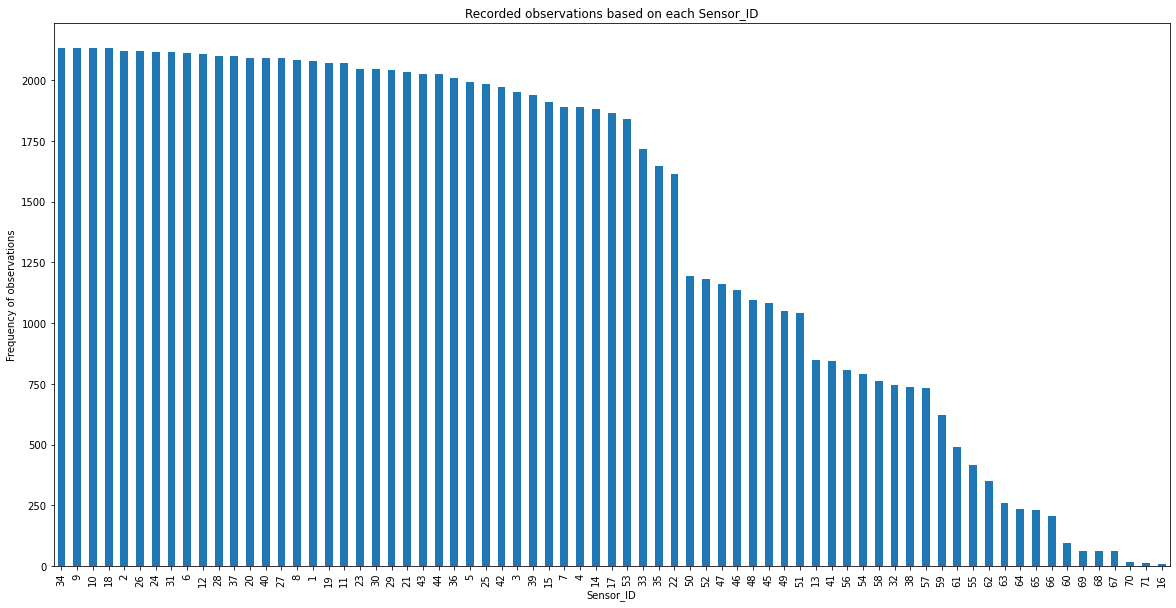

In [555]:
#Visualizing recorded observations based on sensor_ID
z = merged_dataset.index.value_counts().plot(kind = 'bar', figsize = (20,10))
z.set_xlabel("Sensor_ID")
z.set_ylabel("Frequency of observations")
z.set_title("Recorded observations based on each Sensor_ID")

z.plot()